In [63]:
%matplotlib inline

from math import sqrt

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/horsey.csv', parse_dates=['round_date'])

In [3]:
print(df.iloc[0])

round_date                          2016-11-18 00:00:00
round_no                                              2
hole_no                                              13
shot_no                                               1
putt                                                NaN
completed                                          True
left_to_pin_before                                 7560
left_to_pin_after                                   360
penalty                                             NaN
player_name                                David Horsey
name                  DP World Tour Championship, Dubai
course_id                                            48
start_tee                                             1
score                                                 3
par                                                   3
yards                                               204
lie_after                                         Green
lie_before                                      

In [4]:
df.head()

,round_date,round_no,hole_no,shot_no,putt,completed,left_to_pin_before,left_to_pin_after,penalty,player_name,name,course_id,start_tee,score,par,yards,lie_after,lie_before,club,direction
0,2016-11-18,2,13,1,NaN,True,7560,360.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Green,Tee,iron,center
1,2016-11-18,2,13,2,True,True,360,12.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Green,Green,putter,short
2,2016-11-18,2,13,3,True,True,12,1.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Hole,Green,putter,center
3,2016-11-18,2,18,1,NaN,True,19440,9324.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,4,5,620,Fairway,Tee,driver,center
4,2016-11-18,2,18,2,NaN,True,9324,2520.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,4,5,620,Fairway,Fairway,iron,center


In [5]:
df.groupby(['round_date']).size()

round_date
2016-06-23    73
2016-06-24    70
2016-06-25    66
2016-06-26    70
2016-06-30    74
2016-07-01    79
2016-07-07    76
2016-07-08    71
2016-08-18    72
2016-08-19    71
2016-08-20    72
2016-08-21    70
2016-08-25    74
2016-08-26    76
2016-09-08    66
2016-09-09    68
2016-09-10    67
2016-09-11    70
2016-09-15    67
2016-09-16    67
2016-09-17    69
2016-09-18    65
2016-09-22    69
2016-09-23    69
2016-09-24    68
2016-10-06    72
2016-10-07    69
2016-10-08    66
2016-10-09    69
2016-10-13    67
2016-10-14    71
2016-10-15    70
2016-10-16    66
2016-10-20    68
2016-10-21    67
2016-10-22    66
2016-10-23    68
2016-11-03    67
2016-11-04    67
2016-11-05    68
2016-11-06    65
2016-11-10    71
2016-11-11    72
2016-11-12    77
2016-11-13    70
2016-11-17    72
2016-11-18    71
2016-11-19    67
2016-11-20    67
dtype: int64

In [6]:
putts = df[(df.putt == True) & (df.club == 'putter')].copy()

putts['made_it'] = putts['lie_after'] == 'Hole'
putts['feet_before'] = round(putts['left_to_pin_before'] / 12.0).astype(int)
putts['feet_after'] = putts['left_to_pin_after'] / 12.0
putts['putts_needed'] = putts['score'] - putts['shot_no'] + 1

cols = [
    'round_date', 'round_no', 'hole_no', 'shot_no',
    'left_to_pin_before', 'left_to_pin_after', 'score', 'par', 'direction',
    'made_it', 'feet_before', 'feet_after', 'putts_needed', 
]

putts = putts[cols]

putts.head(20)

,round_date,round_no,hole_no,shot_no,left_to_pin_before,left_to_pin_after,score,par,direction,made_it,feet_before,feet_after,putts_needed
1,2016-11-18,2,13,2,360,12.0,3,3,short,False,30,1.000000,2
2,2016-11-18,2,13,3,12,1.0,3,3,center,True,1,0.083333,1
6,2016-11-18,2,18,4,72,1.0,4,5,center,True,6,0.083333,1
11,2016-11-19,3,2,5,48,1.0,5,5,center,True,4,0.083333,1
14,2016-11-19,3,1,3,216,1.0,3,4,center,True,18,0.083333,1
17,2016-11-19,3,3,3,600,60.0,4,4,long right,False,50,5.000000,2
18,2016-11-19,3,3,4,60,1.0,4,4,center,True,5,0.083333,1
20,2016-11-19,3,4,2,540,72.0,3,3,long right,False,45,6.000000,2
21,2016-11-19,3,4,3,72,1.0,3,3,center,True,6,0.083333,1
23,2016-11-10,1,9,4,324,12.0,5,5,left,False,27,1.000000,2


In [7]:
aggs = {
    'made_it': {
        'putts': len,
        'make': lambda x: sum(x) / len(x),
    },
    'putts_needed': {
        '1': lambda x: (x == 1).sum(),
        '2': lambda x: (x == 2).sum(),
        '3': lambda x: (x == 3).sum(),
    }
}

putt_stats = putts.groupby('feet_before').agg(aggs).reset_index()

putt_stats['fractional_par'] = putt_stats.apply(
    lambda r: sum([
        r['putts_needed'][num] / r['made_it']['putts'] * float(num)
        for num in ['1', '2', '3']
    ]),
    axis=1
)

putt_stats[:15]

feet_before made_it           putts_needed        fractional_par
                 putts      make            1   2  3               
0            1     438  1.000000          438   0  0       1.000000
1            2      81  0.987654           80   1  0       1.012346
2            3      67  0.940299           63   4  0       1.059701
3            4      39  0.897436           35   3  1       1.128205
4            5      56  0.750000           42  14  0       1.250000
5            6      45  0.644444           29  15  1       1.377778
6            7      42  0.714286           30  11  1       1.309524
7            8      35  0.514286           18  17  0       1.485714
8            9      52  0.461538           24  28  0       1.538462
9           10      31  0.516129           16  15  0       1.483871
10          11      19  0.315789            6  13  0       1.684211
11          12      39  0.615385           24  15  0       1.384615
12          13      12  0.333333            4   8  0       1.666667
13          14      12  0.333333            4   8  0       1.666667
14          15      50  0.240000           12  38  0       1.760000

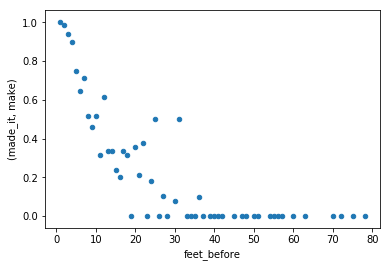

In [8]:
putt_stats.plot(kind='scatter', x='feet_before', y=('made_it', 'make'))

In [9]:
putts.iloc[0]

round_date            2016-11-18 00:00:00
round_no                                2
hole_no                                13
shot_no                                 2
left_to_pin_before                    360
left_to_pin_after                      12
score                                   3
par                                     3
direction                           short
made_it                             False
feet_before                            30
feet_after                              1
putts_needed                            2
Name: 1, dtype: object

In [10]:
# misreads / bad putts

g = putts.groupby('round_date')

miss_summary = g['feet_after'].agg({
    'putts': len,
    'miss_gt_4': lambda x: (x >= 4).sum(),
    'miss_gt_6': lambda x: (x >= 6).sum(),
})

miss_summary.head(10)

,putts,miss_gt_4,miss_gt_6
round_date,,,
2016-06-23,30.0,1.0,1.0
2016-06-24,30.0,1.0,1.0
2016-06-25,26.0,1.0,0.0
2016-06-26,25.0,2.0,1.0
2016-06-30,33.0,3.0,0.0
2016-07-01,34.0,2.0,1.0
2016-07-07,30.0,3.0,2.0
2016-07-08,32.0,2.0,1.0
2016-08-18,31.0,5.0,0.0


In [11]:
miss_summary.describe()

,putts,miss_gt_4,miss_gt_6
count,49.000000,49.000000,49.000000
mean,28.346939,1.204082,0.510204
std,2.194226,1.172241,0.710705
min,23.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000
50%,28.000000,1.000000,0.000000
75%,30.000000,2.000000,1.000000
max,34.000000,5.000000,2.000000


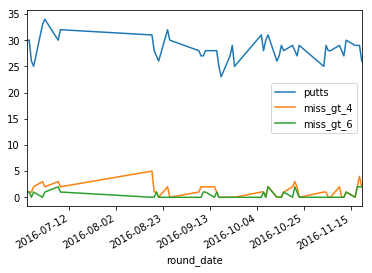

In [12]:
miss_summary.plot()

In [13]:
# misses under 10 feet

miss_lt_10 = putts.query('feet_before <= 10 & made_it == False').copy()

miss_lt_10.groupby('direction').size().sort_values(ascending=False)

direction
right         53
left          43
long right     9
long left      3
short left     2
short          1
dtype: int64

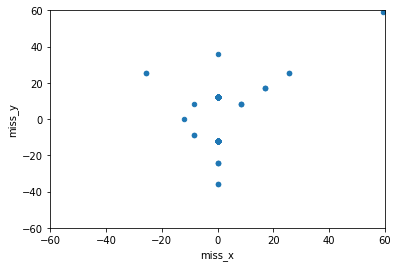

In [14]:
# plot misses

directions = {
    'long': [0, 1],
    'long right': [1, 1],
    'right': [0, 1],
    'short right': [1, -1],
    'short': [-1, 0],
    'short left': [-1, -1],
    'left': [0, -1],
    'long left': [-1, 1],
}

def make_coord(row):
    pt, inches = directions[row['direction']], row['left_to_pin_after']
    is_diagonal = pt[0] != 0 and pt[1] != 0
    pt = [p * inches / (sqrt(2) if is_diagonal else 1) for p in pt]
    return pd.Series(pt)


miss_lt_10[['miss_x', 'miss_y']] = miss_lt_10.apply(make_coord, axis=1)

miss_lt_10 \
    .query('left_to_pin_after < 300') \
    .plot(kind='scatter', x='miss_x', y='miss_y', xlim=(-60, 60), ylim=(-60, 60))

In [103]:
# approach game

approach = df.query('club != "driver" & club != "putter"').copy()

approach['yards_before'] = round(approach['left_to_pin_before'] / 36.0).astype(int)
approach['feet_after'] = approach['left_to_pin_after'] / 12.0
approach['score_norm'] = approach['score'] - approach['par'] 

approach = approach.query('yards_before >= 50 & yards_before < 250')
approach = approach.query('lie_before != "Tee" & par != 3')

print(len(approach))
print(approach.groupby('lie_before').size())

688
lie_before
Fairway               456
Fairway Bunker         26
Greenside Bunker        1
Intermediate Rough     90
Other                   8
Rough                 107
dtype: int64


In [104]:
def bin_num(x, base):
    val = int(x - (x % base))
    return val
#     return '{}-{}'.format(val, val + base)

approach['yards_bin_25'] = approach['yards_before'].apply(lambda x: bin_num(x, 25))
approach['yards_bin_10'] = approach['yards_before'].apply(lambda x: bin_num(x, 10))

In [105]:
g = approach.groupby('yards_bin_10')

a_summary = g['feet_after'].agg({
    'shots': len,
    'mean': np.mean,
    'median': np.median,
    'std': np.std,
})

a_summary

,shots,mean,median,std
yards_bin_10,,,,
50,17.0,22.588235,9.0,29.430127
60,21.0,20.904762,12.0,24.576218
70,23.0,14.869565,10.0,11.318948
80,24.0,23.708333,12.0,25.162911
90,25.0,21.400000,20.0,16.595682
100,36.0,16.611111,16.0,9.681434
110,24.0,19.913043,16.0,12.587559
120,52.0,18.250000,15.0,14.006826
130,42.0,27.952381,21.5,34.437609


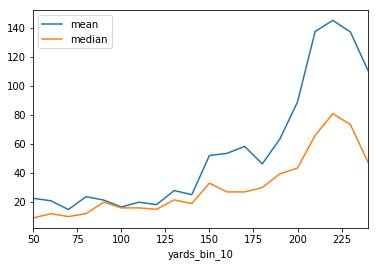

In [106]:
a_summary.plot(y=['mean', 'median'])

In [107]:
# rough penalty

lies = ['Fairway', 'Intermediate Rough', 'Rough']
fair_v_rough = approach[
    (approach.lie_before.isin(lies)) &
    (approach.yards_before < 200)
].copy()

fair_v_rough.groupby('yards_bin_25').size()

yards_bin_25
50      48
75      60
100     85
125    119
150    130
175    123
dtype: int64

In [108]:
g = fair_v_rough.groupby(['yards_bin_25', 'lie_before'])

g['feet_after'].agg({
    'shots': len,
    'mean': np.mean,
    'median': np.median,
}).unstack()

shots                                mean                     \
lie_before   Fairway Intermediate Rough Rough    Fairway Intermediate Rough   
yards_bin_25                                                                  
50              25.0               11.0  12.0  11.920000          18.909091   
75              48.0                9.0   3.0  20.708333          20.777778   
100             65.0               11.0   9.0  17.384615          12.272727   
125             86.0               19.0  14.0  19.441860          23.789474   
150             91.0               16.0  23.0  28.351648          27.500000   
175             84.0               19.0  20.0  31.797619          43.315789   

                          median                            
lie_before         Rough Fairway Intermediate Rough  Rough  
yards_bin_25                                                
50             26.250000     8.0                7.0   26.5  
75             38.000000    13.5               21.0   27.0  
100            26.750000    16.0               12.0   21.5  
125            52.357143    15.0               24.0   46.5  
150            89.173913    27.0               25.5   45.0  
175           141.450000    27.0               42.0  102.0

In [136]:
scoring = fair_v_rough.pivot_table(
    'score_norm',
    index=['yards_bin_25'],
    columns=['lie_before'],
    aggfunc=np.mean,
    fill_value=0
)

scoring['diff'] = scoring['Rough'] - scoring['Fairway']

scoring

lie_before,Fairway,Intermediate Rough,Rough,diff
yards_bin_25,,,,
50,-0.280000,-0.363636,0.333333,0.613333
75,-0.041667,-0.111111,0.000000,0.041667
100,-0.230769,-0.545455,0.555556,0.786325
125,-0.162791,-0.263158,0.285714,0.448505
150,-0.087912,-0.250000,0.434783,0.522695
175,-0.107143,0.157895,0.400000,0.507143


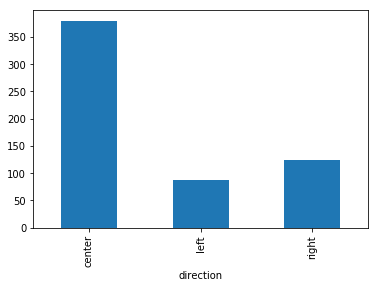

In [143]:
# driver misses

locs = ['center', 'left', 'right']
drives = df.query('club == "driver" & direction == {}'.format(locs)).copy()

drives.groupby('direction').size().plot(kind='bar')